In [2]:
import pandas as pd
import itertools as it
import numpy as np
import json
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc

#### Reading cosine similarity file


In [3]:

cosine_similarity = np.load('knowledgestream/data/relsim/coo_mat_sym_2016-10-24_log-tf_tfidf.npy')
csdf = pd.DataFrame(cosine_similarity)

affinity_matrix = (1/cosine_similarity)-1
distance_matrix = 1-cosine_similarity

<ipython-input-3-c8c49d92f09f>:4: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix = (1/cosine_similarity)-1


#### Loading list of relations


In [4]:

columns = pd.read_csv('resources/relsim/nodes_dbpedia_gephi.csv')

csdf = pd.DataFrame(cosine_similarity)
csdf.index = csdf.columns = list(columns['Label'])

ddf = pd.DataFrame(distance_matrix)
ddf.index = ddf.columns = list(columns['Label'])

adf = pd.DataFrame(affinity_matrix)
adf.index = adf.columns = list(columns['Label'])


#### Plotting the dendrogram

In [15]:
csdf

,dbo:academicAdvisor,dbo:academicDiscipline,dbo:actScore,dbo:addressInRoad,dbo:administrativeCollectivity,dbo:administrativeDistrict,dbo:administrator,dbo:affiliation,dbo:agency,dbo:aircraftAttack,...,dbo:youthWing,foaf:depiction,foaf:homepage,foaf:logo,foaf:page,foaf:thumbnail,owl:differentFrom,rdf:type,rdfs:seeAlso,rdfs:subClassOf
dbo:academicAdvisor,1.000000,0.357547,0.013718,0.062068,0.059236,0.045786,0.031485,0.377766,0.132758,0.053610,...,0.087696,0.167388,0.262293,0.110902,0.092569,0.001161,0.281633,0.243191,0.254473,0.000000
dbo:academicDiscipline,0.357547,1.000000,0.098874,0.229511,0.260052,0.161342,0.043412,0.374459,0.394222,0.060338,...,0.141823,0.492273,0.362264,0.433208,0.183564,0.008100,0.511569,0.379933,0.503142,0.000000
dbo:actScore,0.013718,0.098874,1.000000,0.014227,0.019590,0.011151,0.147743,0.141544,0.018076,0.002068,...,0.008809,0.014053,0.145111,0.018568,0.001877,0.000044,0.068512,0.086235,0.095822,0.000000
dbo:addressInRoad,0.062068,0.229511,0.014227,1.000000,0.510552,0.543454,0.014949,0.146475,0.586973,0.017415,...,0.201442,0.393571,0.224191,0.454757,0.059794,0.000456,0.250982,0.168418,0.244055,0.000000
dbo:administrativeCollectivity,0.059236,0.260052,0.019590,0.510552,1.000000,0.620485,0.017047,0.152457,0.614868,0.021027,...,0.161959,0.403110,0.244541,0.506841,0.080223,0.000301,0.264970,0.178227,0.274975,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
foaf:thumbnail,0.001161,0.008100,0.000044,0.000456,0.000301,0.000188,0.000000,0.002750,0.004374,0.001473,...,0.000353,0.004476,0.003005,0.007051,0.001142,1.000000,0.018591,0.025792,0.026449,0.000000
owl:differentFrom,0.281633,0.511569,0.068512,0.250982,0.264970,0.221542,0.026712,0.543536,0.478258,0.166166,...,0.266260,0.538825,0.812784,0.473865,0.179630,0.018591,1.000000,0.857578,0.936269,0.000000
rdf:type,0.243191,0.379933,0.086235,0.168418,0.178227,0.154449,0.034599,0.459243,0.316698,0.200724,...,0.205011,0.378889,0.737781,0.304248,0.151258,0.025792,0.857578,1.000000,0.876208,0.302714
rdfs:seeAlso,0.254473,0.503142,0.095822,0.244055,0.274975,0.219327,0.030444,0.524878,0.460159,0.204753,...,0.243761,0.510467,0.782659,0.437464,0.170123,0.026449,0.936269,0.876208,1.000000,0.000000


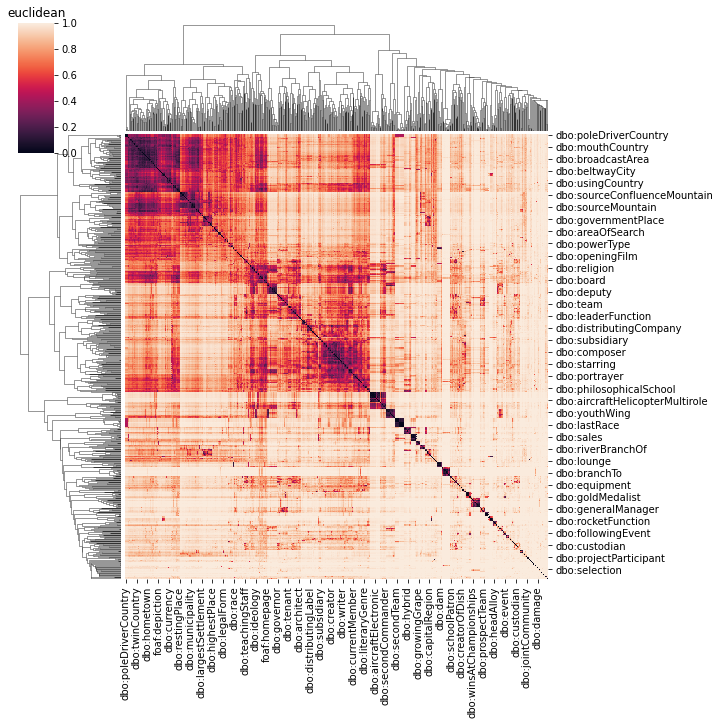

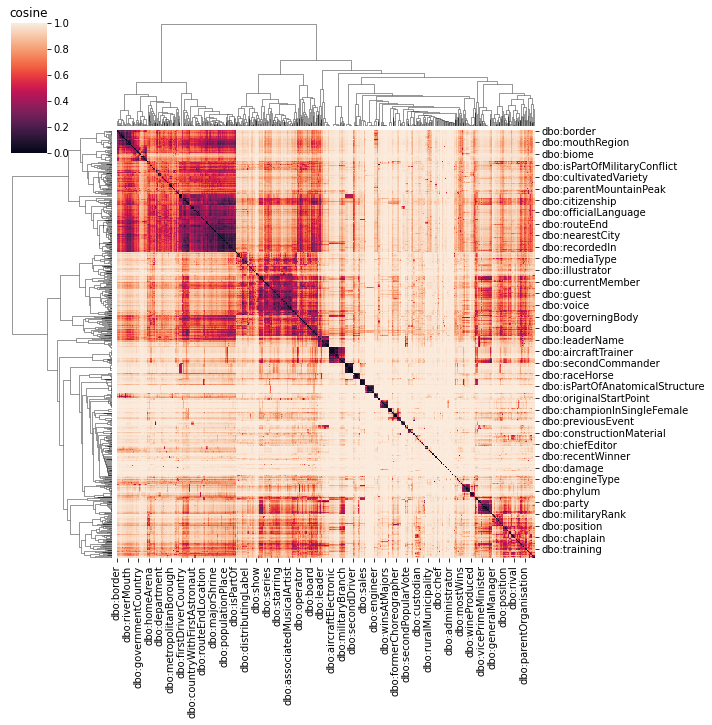

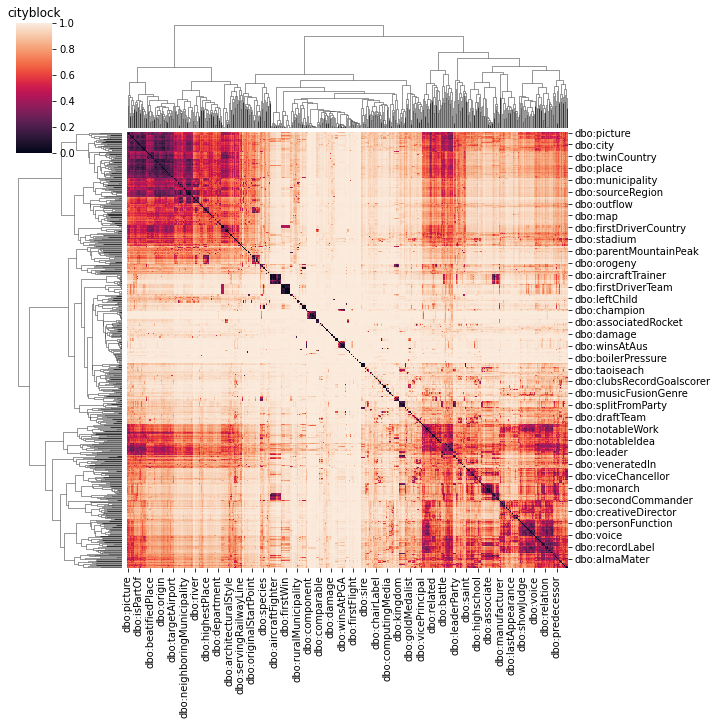

In [14]:

for index, metric in enumerate(["euclidean", "cosine", "cityblock"]):

    sns.clustermap(ddf, metric=metric, standard_scale=1, method="average")
    plt.title(metric)
    plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
labels = agg_clustering.fit_predict(ddf)

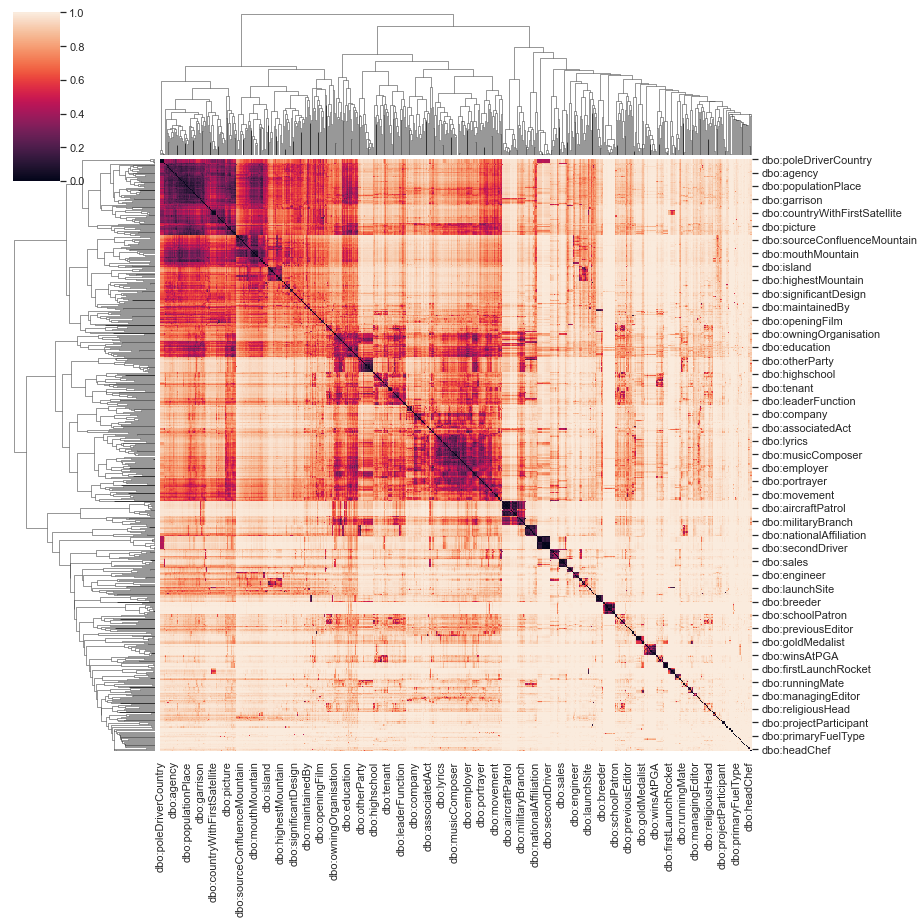

In [134]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
correlations = ddf
correlations_array = np.asarray(ddf)

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage,method="average",
                figsize=(13, 13))

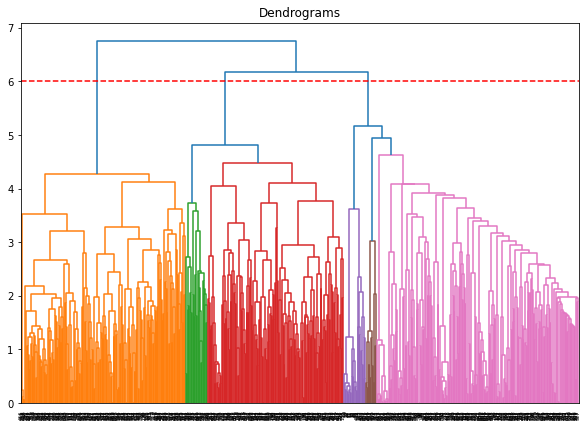

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(csdf, method='average'))
plt.axhline(y=6, color='r', linestyle='--')